In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
book_data=pd.read_csv("book.csv")
book_data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


<ipython-input-3-c168c6a50ede>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk')


Text(0, 0.5, 'support')

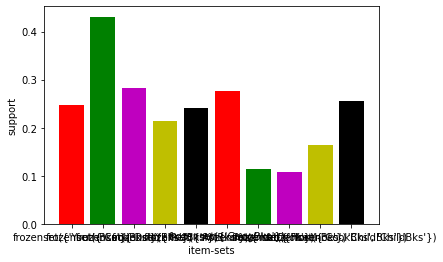

In [3]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(book_data,min_support=0.05,use_colnames=True,max_len=3)
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets')
plt.ylabel('support')

In [4]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

In [5]:
def to_list(i):
    return (sorted(list(i)))

In [6]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [7]:
ma_X = ma_X.apply(sorted)

In [8]:
rules_sets = list(ma_X)

In [9]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [10]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [11]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [13]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
180,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
258,"(ArtBks, CookBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778
234,"(CookBks, DoItYBks)",(ItalCook),0.1875,0.1135,0.0585,0.312000,2.748899,0.037219,1.288517
210,"(YouthBks, ArtBks)",(GeogBks),0.1010,0.2760,0.0650,0.643564,2.331755,0.037124,2.031222
34,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
288,"(ArtBks, RefBks)",(GeogBks),0.0895,0.2760,0.0565,0.631285,2.287264,0.031798,1.963576
252,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
174,"(YouthBks, CookBks)",(GeogBks),0.1620,0.2760,0.0970,0.598765,2.169440,0.052288,1.804431
282,"(ArtBks, DoItYBks)",(GeogBks),0.1235,0.2760,0.0730,0.591093,2.141642,0.038914,1.770574
204,"(YouthBks, RefBks)",(GeogBks),0.0965,0.2760,0.0570,0.590674,2.140122,0.030366,1.768759
